# Exploratory data analysis and linear regression

## Preparation

### Imports

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

%matplotlib inline

In [75]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import cm
import seaborn as sns
pd.set_option('display.max_columns', None)

### Load data

In [224]:
# Read csv file (dataset.csv)
df = pd.read_csv("dataset.csv")

In [225]:
all_columns = [df.columns]

In [226]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [229]:
# We are not going to use all the columns, only numerical ones for now
columns_to_remain = ["Id", "MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearRemodAdd", "PoolArea",
                     "YearBuilt", "MasVnrArea", "GarageArea", "ScreenPorch", "MiscVal", "MoSold", "YrSold", "FullBath", "HalfBath",
                    "TotalBsmtSF", "GrLivArea", "SalePrice"]

df = df[columns_to_remain]

In [230]:
df.shape

(1460, 20)

In [231]:
print(f"Total number of obsevations in dataset: {df.shape[0]}")

Total number of obsevations in dataset: 1460


### Dataset overview

The dataset includes the information of the houses. The observations consists of different house's charachteristics (features) and the sale price (label).

**Ask yourself, what are the factors that contribute or define the price for a house? Obviously, the total house area. Number of rooms? Location? A thousand of other factors? Exactly. So the dataset features the information for house prices in one of the cities in the US. It includes (or the selected part of it) includes 18 features/characteristics and with that you are challenged to predict the final price of each house.**

In [232]:
df.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,PoolArea,YearBuilt,MasVnrArea,GarageArea,ScreenPorch,MiscVal,MoSold,YrSold,FullBath,HalfBath,TotalBsmtSF,GrLivArea,SalePrice
0,1,60,65.0,8450,7,5,2003,0,2003,196.0,548,0,0,2,2008,2,1,856,1710,208500
1,2,20,80.0,9600,6,8,1976,0,1976,0.0,460,0,0,5,2007,2,0,1262,1262,181500
2,3,60,68.0,11250,7,5,2002,0,2001,162.0,608,0,0,9,2008,2,1,920,1786,223500


**Get overview statistics of for each of the columns**

In [233]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,PoolArea,YearBuilt,MasVnrArea,GarageArea,ScreenPorch,MiscVal,MoSold,YrSold,FullBath,HalfBath,TotalBsmtSF,GrLivArea,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1984.865753,2.758904,1971.267808,103.685262,472.980137,15.060959,43.489041,6.321918,2007.815753,1.565068,0.382877,1057.429452,1515.463699,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,20.645407,40.177307,30.202904,181.066207,213.804841,55.757415,496.123024,2.703626,1.328095,0.550916,0.502885,438.705324,525.480383,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,334.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,1954.000000,0.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,1.000000,0.000000,795.750000,1129.500000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,1973.000000,0.000000,480.000000,0.000000,0.000000,6.000000,2008.000000,2.000000,0.000000,991.500000,1464.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2004.000000,0.000000,2000.000000,166.000000,576.000000,0.000000,0.000000,8.000000,2009.000000,2.000000,1.000000,1298.250000,1776.750000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,738.000000,2010.000000,1600.000000,1418.000000,480.000000,15500.000000,12.000000,2010.000000,3.000000,2.000000,6110.000000,5642.000000,755000.000000


## Initial data analysis with Pandas

**Plot a histogram (distribution) of the target variable: SapePrice**

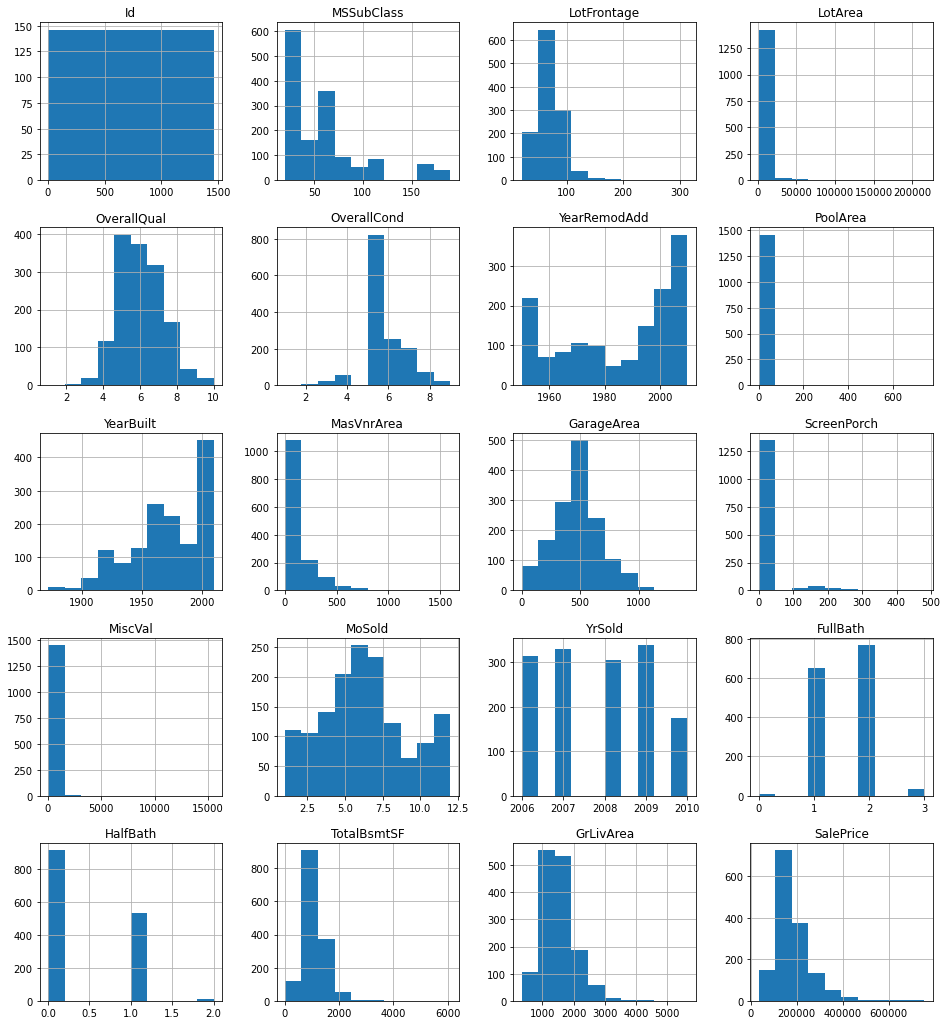

In [234]:
df.hist(figsize = (16,18))
plt.show()

### Missing values

**Sometimes, data have missing values or nans ("not a values"), you can get a number and percentage of missing values for each column with the following chunk of code:**

In [235]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LotFrontage,259,0.177397
MasVnrArea,8,0.005479
Id,0,0.000000
ScreenPorch,0,0.000000
GrLivArea,0,0.000000
TotalBsmtSF,0,0.000000
HalfBath,0,0.000000
FullBath,0,0.000000
YrSold,0,0.000000
MoSold,0,0.000000


**So, only 2 columns have missing values. To simplify things, let's not conduct any further analysis, but just impute these values with a mean column value. This is a quite common technique, however its relevance might depend on certain cases**

We will talk about missing values more in the lecture "Feature Engineering"

In [236]:
df.fillna({'LotFrontage': df['LotFrontage'].mean(),
           'MasVnrArea': df['MasVnrArea'].mean()}, inplace=True)

### Scatterplots

**Choose 2 different variables/features (SalePrice is not a feature) and plot 2 scatterplots of those features against SalePrice. Provide your comments.**

Text(0, 0.5, 'SalePrice')

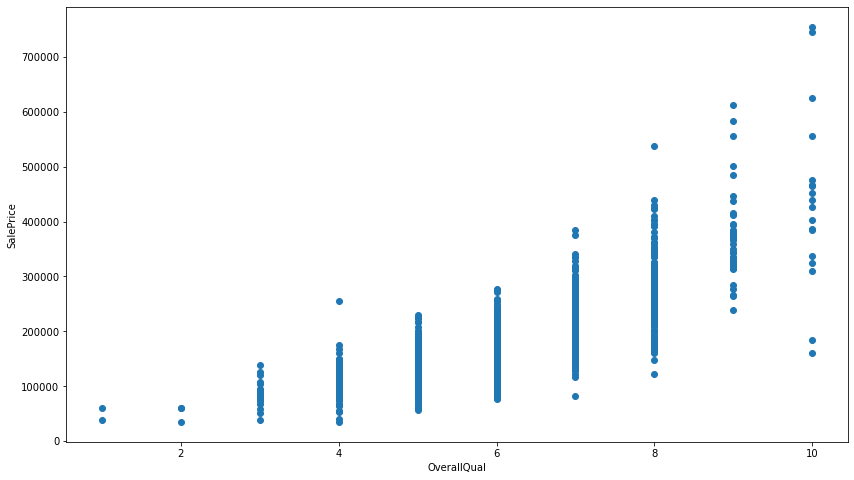

In [237]:
figure = plt.figure(figsize=(14,8))
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual');
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

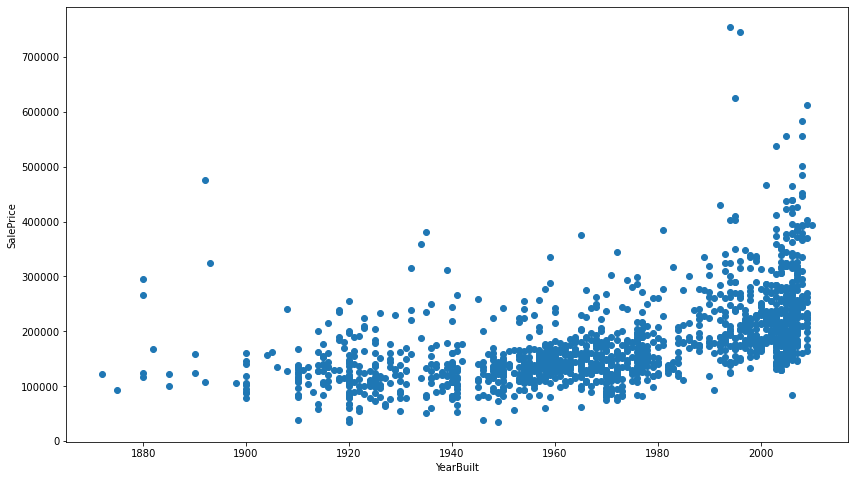

In [238]:
figure = plt.figure(figsize=(14,8))
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt');
plt.ylabel('SalePrice')


**Your comments: There is a correlation between the price of the houses and their green area, the price increases as the houses have a bigger area. While in the second graphic there is also a relation between the year the house is built and its price, at first sight looks like the newer the house the more expensive it is. They both have a linear behavior** 

In [239]:
# Here we separate our target variable, SalePrice, from other variable that will be used for prediction.
# ID is also dropped since it doesn't really bear any meaningful information for prediction.

y = df['SalePrice']
X = df.drop(['SalePrice', 'Id'], axis = 1) #droped Id on previous step where i decided what columns shoud be remaining

### Normalization

**Write a function for column normalization. It should receive a series and return a transformed (normalized result)**

In [240]:
# Your code here
def normalization(feature):
    y = (feature - feature.min())/ (feature.max() - feature.min())
    return y

In [241]:
X.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,PoolArea,YearBuilt,MasVnrArea,GarageArea,ScreenPorch,MiscVal,MoSold,YrSold,FullBath,HalfBath,TotalBsmtSF,GrLivArea
0,60,65.0,8450,7,5,2003,0,2003,196.0,548,0,0,2,2008,2,1,856,1710
1,20,80.0,9600,6,8,1976,0,1976,0.0,460,0,0,5,2007,2,0,1262,1262
2,60,68.0,11250,7,5,2002,0,2001,162.0,608,0,0,9,2008,2,1,920,1786


In [242]:
X = X.apply(normalization) # this code will apply the transformation to every column

In [243]:
X.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,PoolArea,YearBuilt,MasVnrArea,GarageArea,ScreenPorch,MiscVal,MoSold,YrSold,FullBath,HalfBath,TotalBsmtSF,GrLivArea
0,0.235294,0.150685,0.033420,0.666667,0.500,0.883333,0.0,0.949275,0.12250,0.386460,0.0,0.0,0.090909,0.50,0.666667,0.5,0.140098,0.259231
1,0.000000,0.202055,0.038795,0.555556,0.875,0.433333,0.0,0.753623,0.00000,0.324401,0.0,0.0,0.363636,0.25,0.666667,0.0,0.206547,0.174830
2,0.235294,0.160959,0.046507,0.666667,0.500,0.866667,0.0,0.934783,0.10125,0.428773,0.0,0.0,0.727273,0.50,0.666667,0.5,0.150573,0.273549


### train test split
Take the 70% of dataset as the training data and 30% as the test data

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
X_train.shape, y_train.shape


((1021, 18), (1021,))

In [245]:

X_test.shape, y_test.shape

((439, 18), (439,))

## Modeling

**Create a linear regression model and train it on the train data**

In [246]:
model = LinearRegression()
trained_model = model.fit(X_train, y_train)
test_model = model.fit(X_test, y_test)

**Make a prediction for both train and test data**

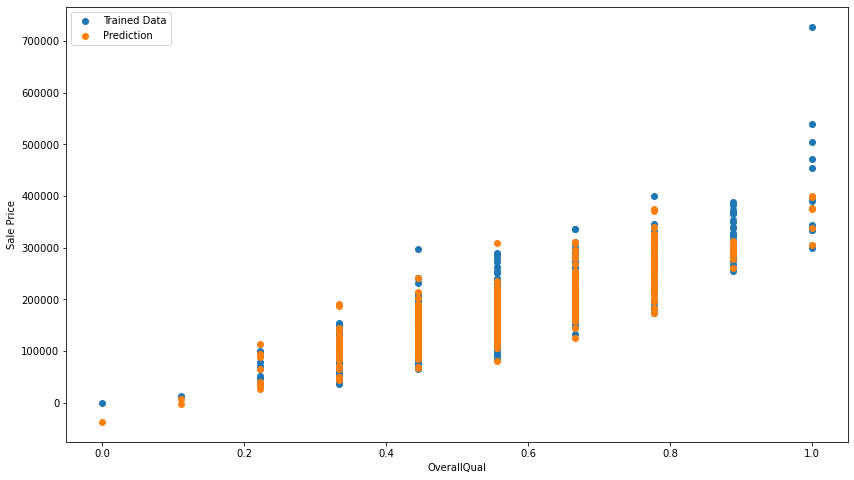

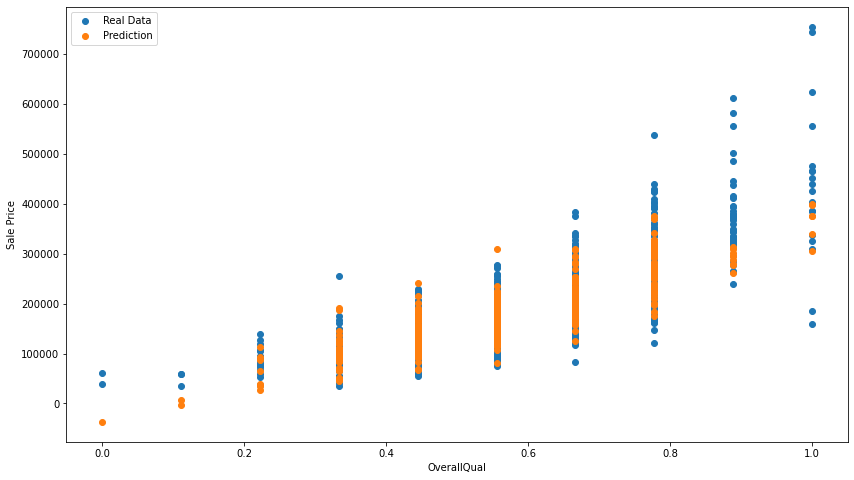

In [247]:
y_pred_train = trained_model.predict(X_train)
y_pred_test = test_model.predict(X_test)

figure = plt.figure(figsize=(14,8))
plt.scatter(X_train['OverallQual'], y_pred_train)
plt.scatter(X_test['OverallQual'], y_pred_test)
plt.legend(['Trained Data', 'Prediction'])
plt.xlabel('OverallQual')
plt.ylabel('Sale Price')
plt.show()

figure = plt.figure(figsize=(14,8))
plt.scatter(X['OverallQual'], y)
plt.scatter(X_test['OverallQual'], y_pred_test)
plt.legend(['Real Data', 'Prediction'])
plt.xlabel('OverallQual')
plt.ylabel('Sale Price')
plt.show()

**Implement your own mean squarred error calculator. Also, plot a histogram for model residuals**

*Hint: residuals are what's left from prediction, the difference between real values and predicted ones. No absolute values, in can be negative and positive*

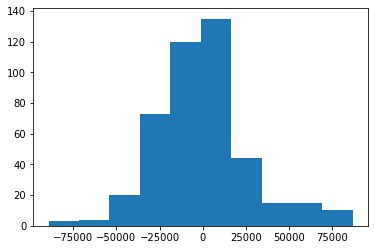

In [248]:
def mse(y_true, y_pred):
    mse_error = mean_squared_error(y_true, y_pred)
    return mse_error


def plot_residuals_histogram(y_true, y_pred):
    """Create histogram for the residuals"""
    residuals =  y_true - y_pred
    plt.hist(residuals)
    plt.show()
plot_residuals_histogram(y_test, y_pred_test)

In [249]:
print("MSE on the train dataset: {:.3}".format(mse(y_train, y_pred_train)))
print("MSE on the test dataset: {:.3}".format(mse(y_test, y_pred_test)))
print('\n')
print("R2 score on the train dataset: {:.2f}".format(r2_score(y_train, y_pred_train)))
print("R2 score on the val dataset: {:.2f}".format(r2_score(y_test, y_pred_test)))

MSE on the train dataset: 1.66e+09
MSE on the test dataset: 7.22e+08


R2 score on the train dataset: 0.75
R2 score on the val dataset: 0.87


In [250]:
assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)

**Print out coefficient for every column of your data. Provide some explanation.**

In [251]:
trained_model.coef_, test_model.coef_

(array([-18243.14793987,  -2666.53562244,  97705.77810634, 143400.79621717,
         27979.31616801,  14673.21582576,   9025.78316645,  56584.89287868,
         48379.60884408,  56620.60321416,  40583.39398276, 128718.36413567,
        -11927.21125143,  -4578.92741355, -21440.54061518,  -4788.90764947,
        159320.90216154, 319441.38423006]),
 array([-18243.14793987,  -2666.53562244,  97705.77810634, 143400.79621717,
         27979.31616801,  14673.21582576,   9025.78316645,  56584.89287868,
         48379.60884408,  56620.60321416,  40583.39398276, 128718.36413567,
        -11927.21125143,  -4578.92741355, -21440.54061518,  -4788.90764947,
        159320.90216154, 319441.38423006]))

In [252]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'PoolArea', 'YearBuilt', 'MasVnrArea', 'GarageArea',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'FullBath', 'HalfBath',
       'TotalBsmtSF', 'GrLivArea'],
      dtype='object')

Your comments here: 
The prediction reached a 75% accuracy score. According to the coefficient results  some ofthe features that have a major impact on the sales prices are the OverallQual, TotalBsmtSF and GrLivArea, which is logical since in genereal if the quality of a house is good then the price is higher, or if a house has a great green area it makes it more attractive and therefore more expensive. On the other hand features like LotFrontage, MSSubClass and YrSold wich have negative values affect the prices less. For instance, the year that the house was sold has little relevance when it comes to its price.